In [1]:
#Objective:3
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Define the distance function
def distance_to_line(point, direction, line_point):
    I = np.eye(2)
    a = np.array(direction)
    b = np.array(line_point)
    return np.linalg.norm((I - np.outer(a, a)).dot(point - b))

# Gradient of the cost function with respect to direction vector 'a' and line point 'b'
def gradient_cost_function(cluster_coordinates, direction, line_point):
    grad_direction = np.zeros(2)
    grad_point = np.zeros(2)

    for point in cluster_coordinates:
        point = np.array(point)
        grad_direction += 2 * np.dot((np.eye(2) - np.outer(direction, direction)), point - line_point)
        grad_point += 2 * np.dot(direction, point - line_point) * direction

    return grad_direction, grad_point

# Gradient descent optimization to minimize the cost function
def gradient_descent(cluster_coordinates, initial_direction, initial_point, learning_rate=0.01, max_iterations=1000, tolerance=1e-5):
    direction = initial_direction
    point = initial_point

    for i in range(max_iterations):
        grad_direction, grad_point = gradient_cost_function(cluster_coordinates, direction, point)
        new_direction = direction - learning_rate * grad_direction
        new_point = point - learning_rate * grad_point

        if np.linalg.norm(new_direction - direction) < tolerance and np.linalg.norm(new_point - point) < tolerance:
            break

        direction = new_direction
        point = new_point

    return direction, point

# Load the dataset
data = pd.read_csv(r'C:\Users\aamir\OneDrive\Desktop\CSV Files\housing.csv')

# Extract latitude and longitude features
coordinates = data[['longitude', 'latitude']].values

# Define the number of clusters (k)
k = 3  # You can adjust this number based on your requirements

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(coordinates)

# Initialize variables to store the lines and total cost
lines = []
total_cost = 0

# Iterate over clusters
for cluster_id, cluster_data in data.groupby('cluster'):
    # Extract coordinates of houses in the cluster
    cluster_coordinates = cluster_data[['longitude', 'latitude']].values

    # Compute the initial line parameters (mean as line point, random direction)
    initial_direction = np.random.rand(2)
    initial_point = np.mean(cluster_coordinates, axis=0)

    # Optimize the line parameters using gradient descent
    direction, point = gradient_descent(cluster_coordinates, initial_direction, initial_point)

    # Compute the total cost
    for index, row in cluster_data.iterrows():
        total_cost += distance_to_line(row[['longitude', 'latitude']].values, direction, point)

    # Store the optimized line parameters
    lines.append({'direction': direction, 'point': point})

# Return the set of efficient lines and total cost
print("Efficient Lines:")
for idx, line in enumerate(lines):
    print(f"Line {idx + 1}: Direction = {line['direction']}, Point = {line['point']}")
print("Total Cost:", total_cost)

C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Efficient Lines:
Line 1: Direction = [0.31702725 0.0892315 ], Point = [-121.93029495   38.11365147]
Line 2: Direction = [0.08442687 0.94569326], Point = [-117.88493836   33.82435098]
Line 3: Direction = [0.86855063 0.8745207 ], Point = [-119.71000542   35.99619848]
Total Cost: 13603.769741545962


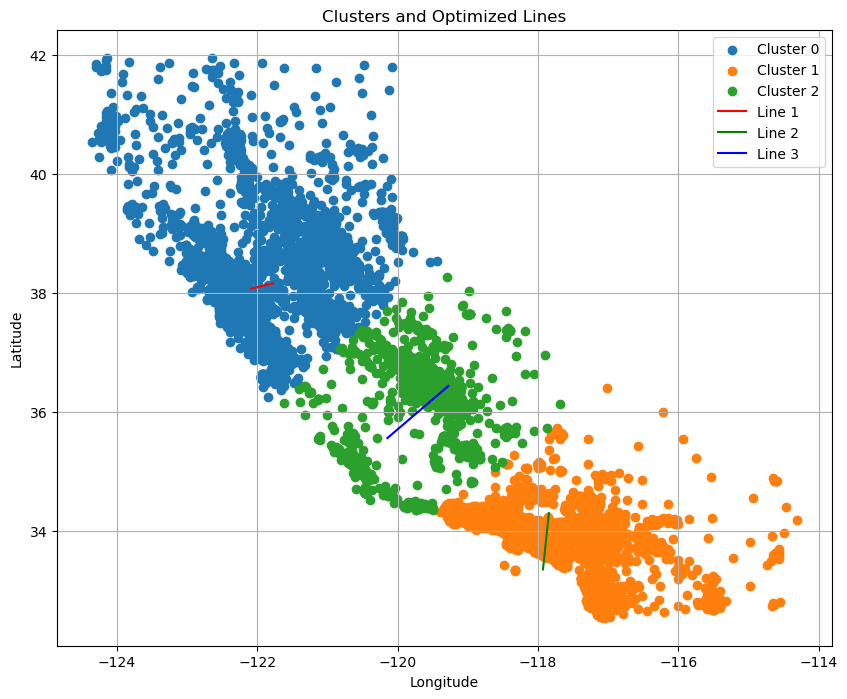

In [2]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 8))

for cluster_id, cluster_data in data.groupby('cluster'):
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster_id}')

# Plot the lines with different colors
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # List of colors
for idx, line in enumerate(lines):
    direction = line['direction']
    point = line['point']
    
    x_values = [point[0] - 0.5 * direction[0], point[0] + 0.5 * direction[0]]
    y_values = [point[1] - 0.5 * direction[1], point[1] + 0.5 * direction[1]]
    
    plt.plot(x_values, y_values, label=f'Line {idx + 1}', color=colors[idx % len(colors)])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters and Optimized Lines')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
#Obj:3 Silhouette Score
from sklearn.metrics import silhouette_score

# Example usage
coordinates = data[['longitude', 'latitude']].values
k = 3  # Number of clusters

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(coordinates)

# Compute Silhouette Score
silhouette_score_value = silhouette_score(coordinates, cluster_labels)
print("Silhouette Score:", silhouette_score_value)

C:\Users\aamir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6471818705345762
